In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn 
import scipy

### 1.Import Train Dataset

In [57]:
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\logistic_regression\train.csv")

In [59]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
data.shape

(614, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.Data cleaning and preprocessing

In [67]:
data.drop(['Loan_ID'],axis = 1, inplace =True)

In [69]:
data_categorical = data.dtypes[data.dtypes == 'object'].index
data_numeric = data.dtypes[data.dtypes != 'object'].index
data_categorical
data_numeric

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### 3.Handling Missing Data

In [73]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)


In [75]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 4.Visualization

In [79]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
data.describe(include = 'O')  # o =object

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


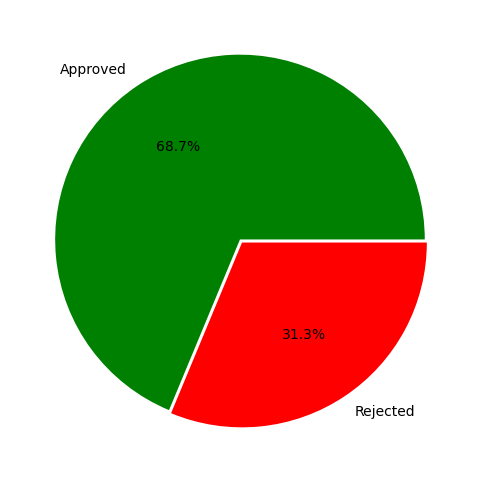

In [83]:
plt.figure(figsize = (10,6))
labels = ['Approved','Rejected']
explode = [.01,.01]
color = ['Green','Red']
sizes = data.Loan_Status.value_counts().values

plt.pie(sizes,explode,labels,autopct = "%1.1f%%", colors = color)
plt.show()

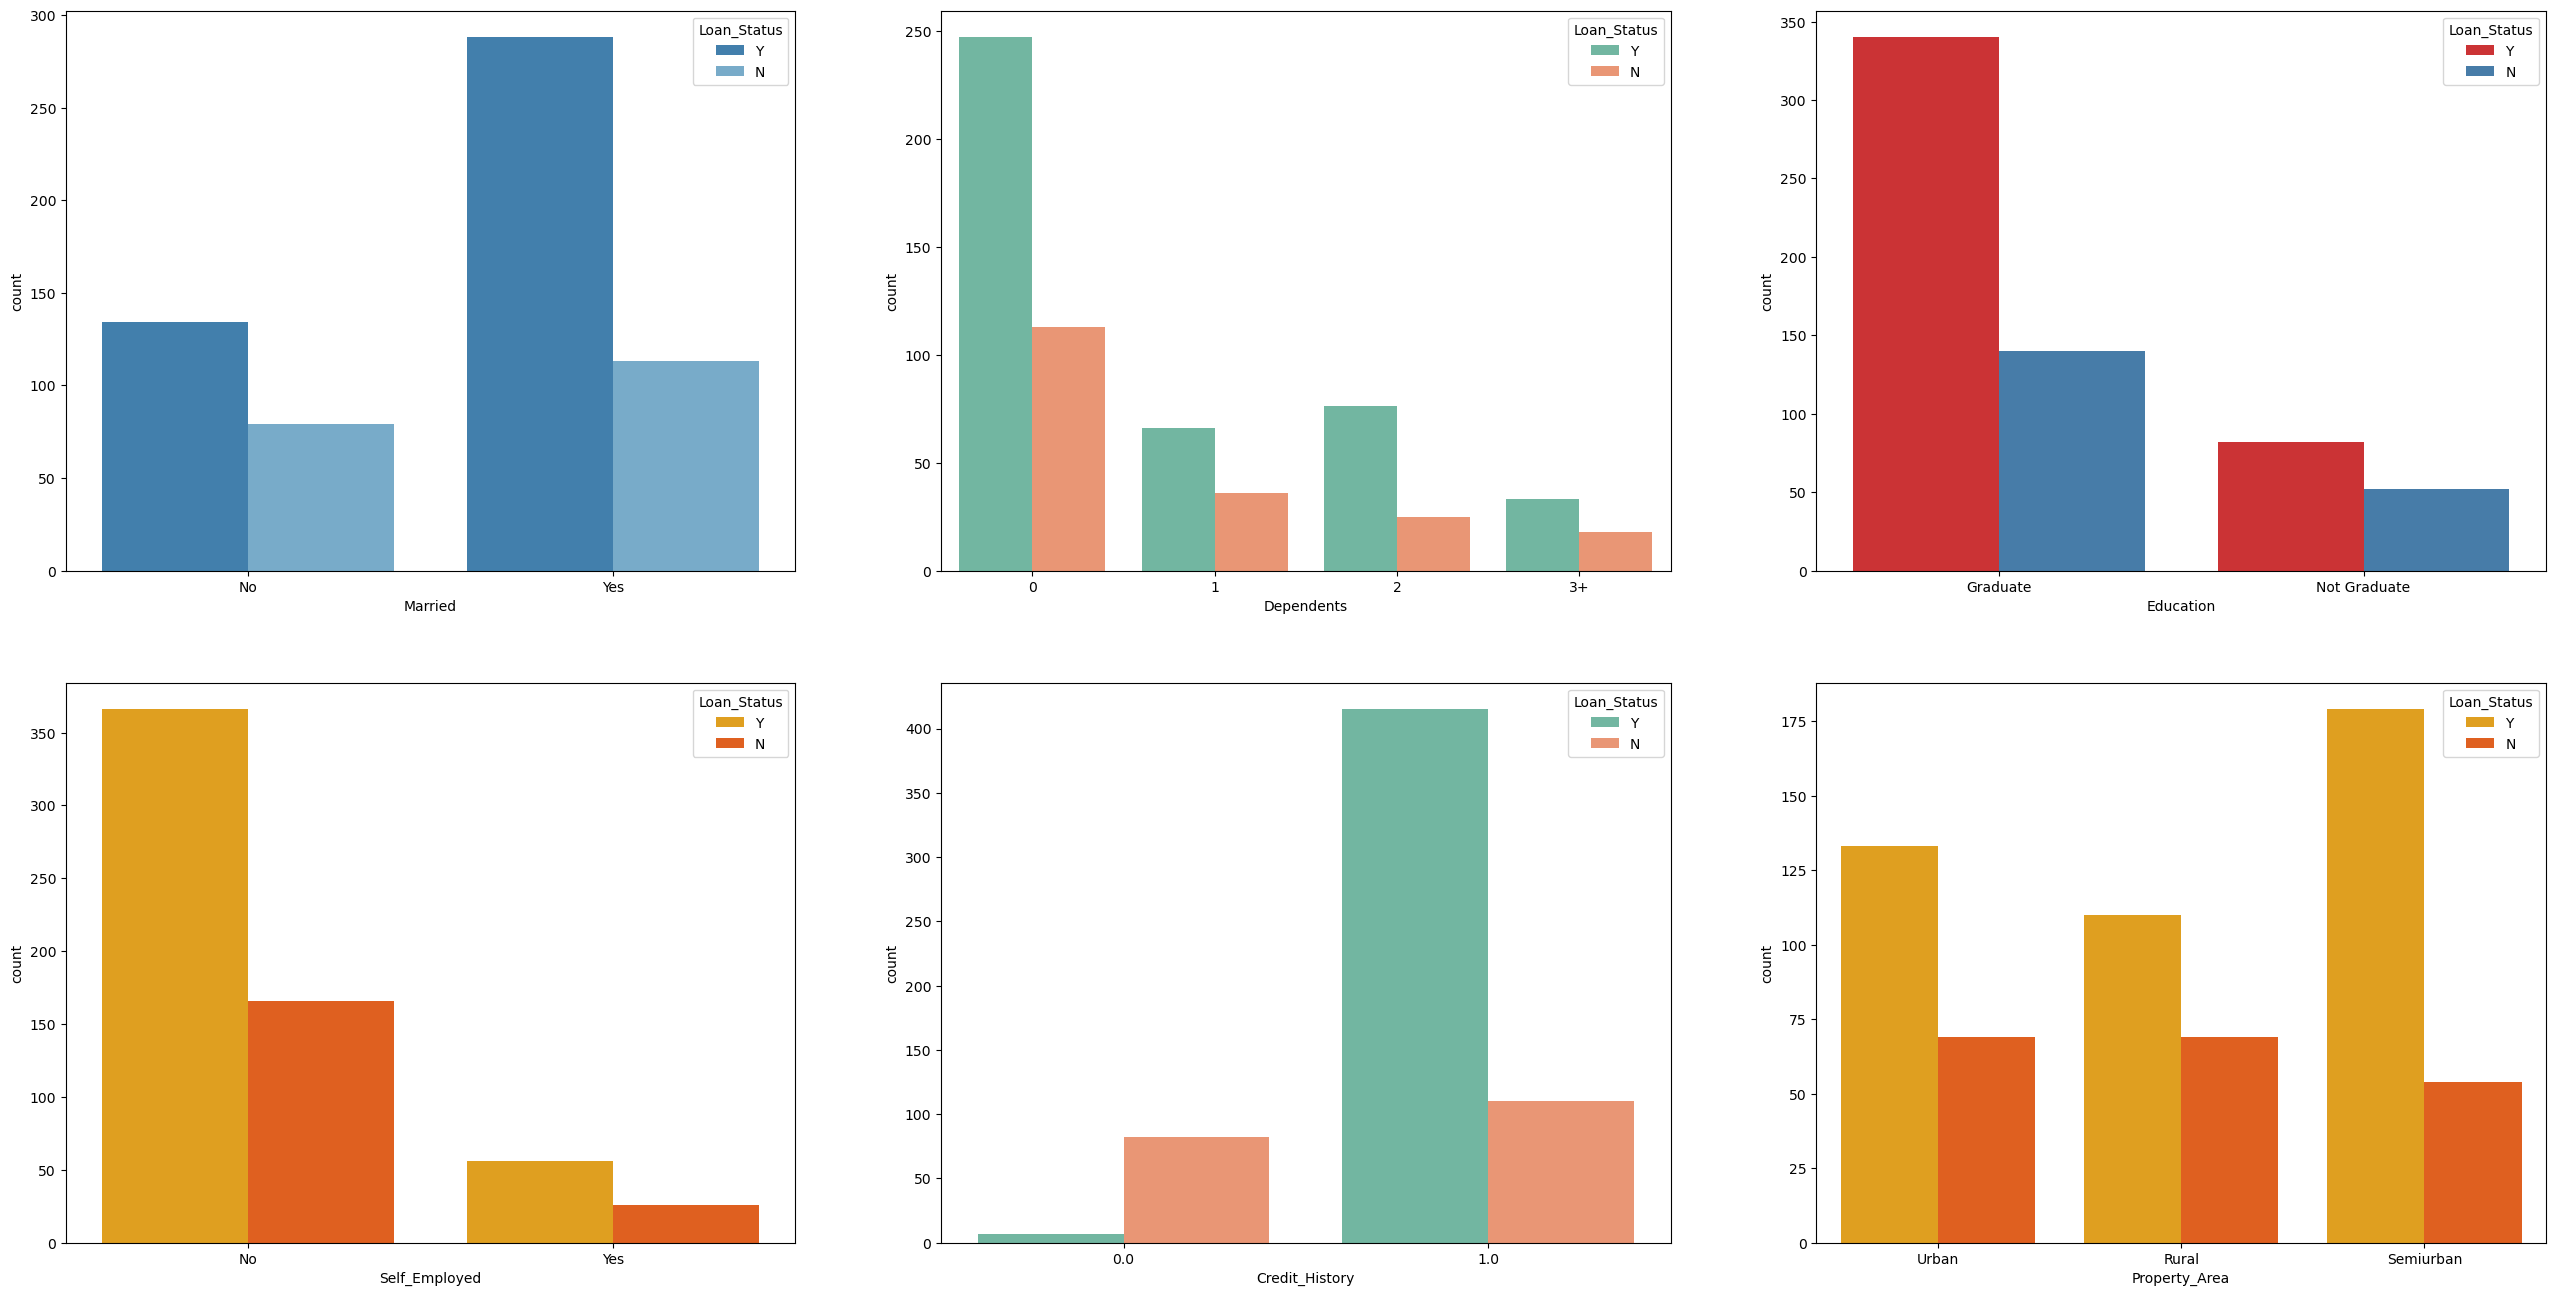

In [85]:
#plot the countplot to analyze the realtion between dependent and independent variables

fig , ax= plt.subplots(2,3, figsize = (32,16))

sns.countplot(x = 'Married', hue= 'Loan_Status', data = data, palette = 'tab20c', ax =ax[0][0])
sns.countplot(x = 'Dependents', hue= 'Loan_Status', data = data, palette = 'Set2', ax =ax[0][1])
sns.countplot(x = 'Education', hue= 'Loan_Status', data = data, palette = 'Set1', ax =ax[0][2])
sns.countplot(x = 'Self_Employed', hue= 'Loan_Status', data = data, palette = 'autumn_r', ax =ax[1][0])
sns.countplot(x = 'Credit_History', hue= 'Loan_Status', data = data, palette = 'Set2', ax =ax[1][1])
sns.countplot(x = 'Property_Area', hue= 'Loan_Status', data = data, palette = 'autumn_r', ax =ax[1][2])

plt.show()

### 5.Handling Categorical data

In [88]:
data_categorical

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [92]:
data.describe(include = 'O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


In [94]:
from sklearn.preprocessing import LabelEncoder
col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
Label_Encoding = LabelEncoder()
for i in col:
    data[i] = Label_Encoding.fit_transform(data[i])

In [96]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


### 6.Handling Outliers

In [102]:
data_numeric

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

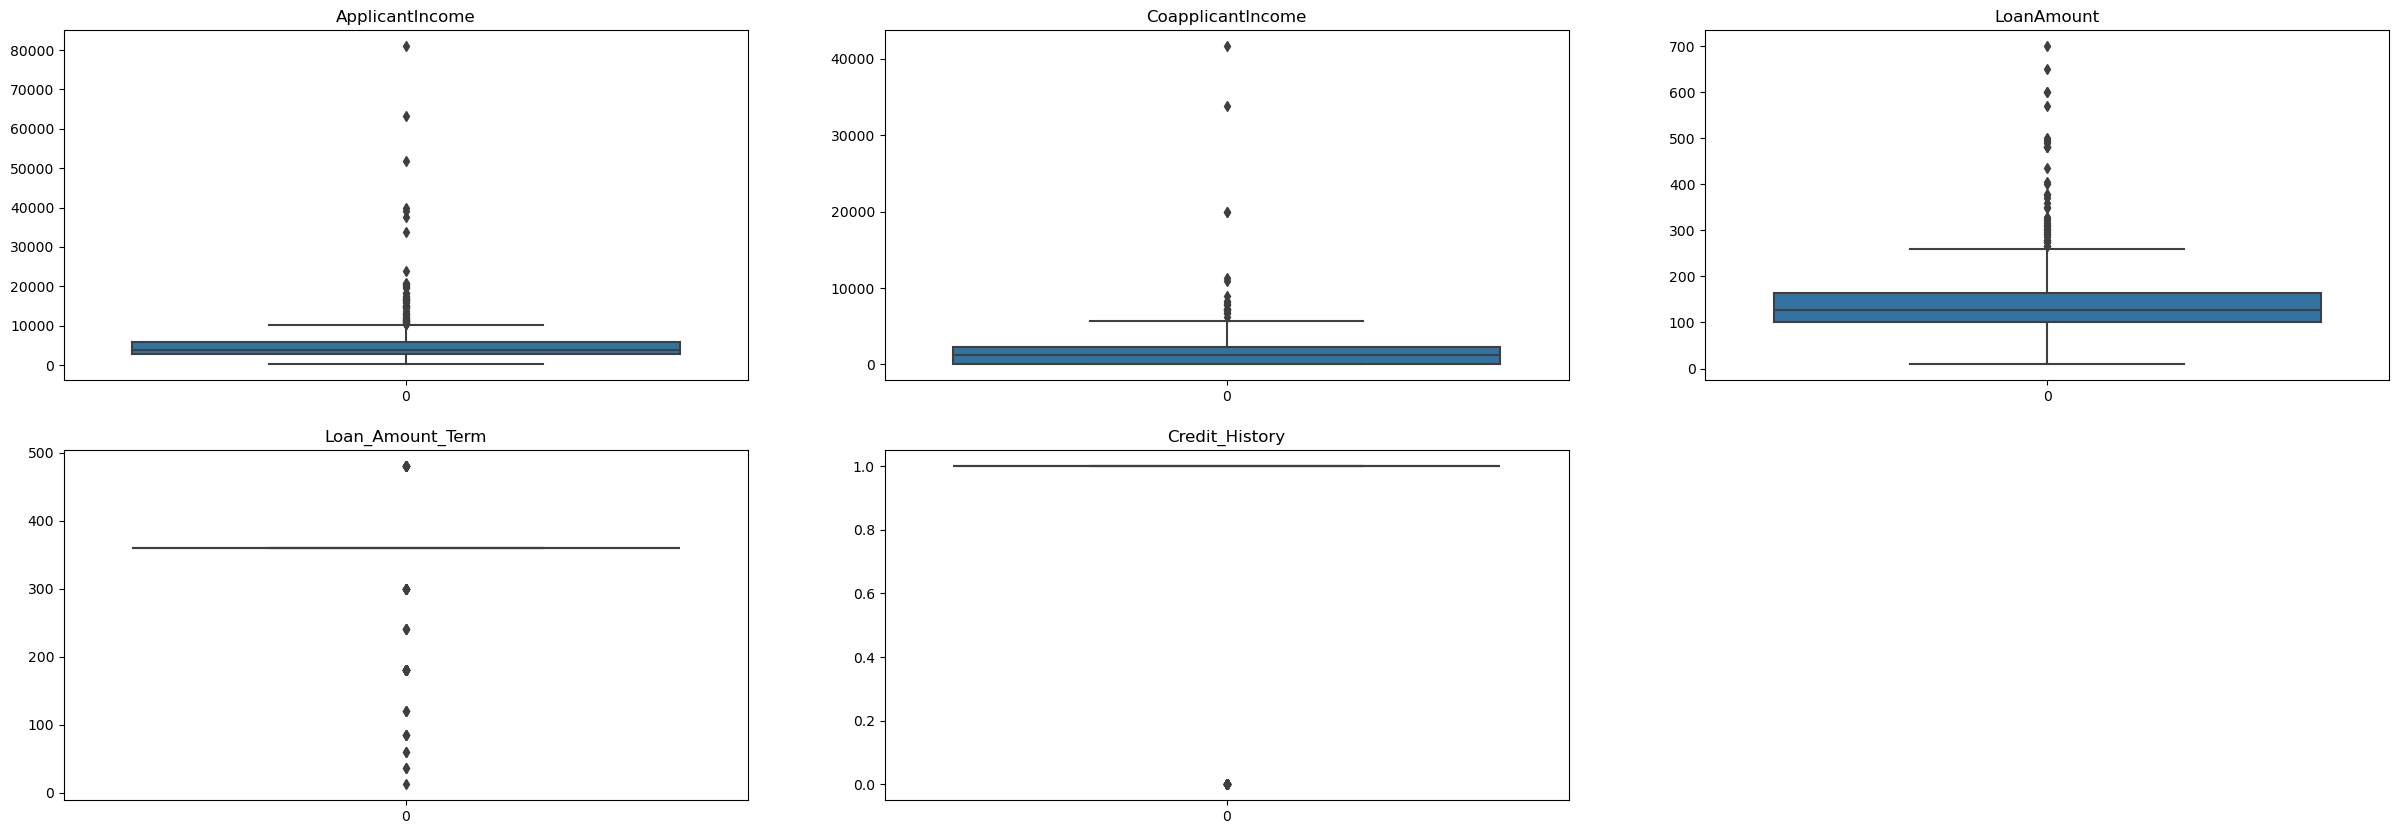

In [104]:
col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize = (30,10))
n = np.arange(0,5,1)

for i , k in zip(col,n):
    plt.subplot(2,3,k+1)
    sns.boxplot(data[i])
    plt.title(col[k])
    plt.tight_layout

In [108]:
q1 = data.ApplicantIncome.quantile(0.25)
q3 = data.ApplicantIncome.quantile(0.75)
iqr = q3-q1
data = data[(data.ApplicantIncome >= q1-1.5*iqr) & (data.ApplicantIncome <= q3+1.5*iqr)]


In [110]:
data.shape

(564, 12)

In [112]:
q1 = data.CoapplicantIncome.quantile(0.25)
q3 = data.CoapplicantIncome.quantile(0.75)
iqr = q3-q1
data = data[(data.CoapplicantIncome >= q1-1.5*iqr) & (data.CoapplicantIncome <= q3+1.5*iqr)]

In [114]:
data.shape

(548, 12)

In [116]:
q1 = data.LoanAmount.quantile(0.25)
q3 = data.LoanAmount.quantile(0.75)
iqr = q3-q1
data = data[(data.LoanAmount >= q1-1.5*iqr) & (data.LoanAmount <= q3+1.5*iqr)]

In [118]:
data.shape

(520, 12)

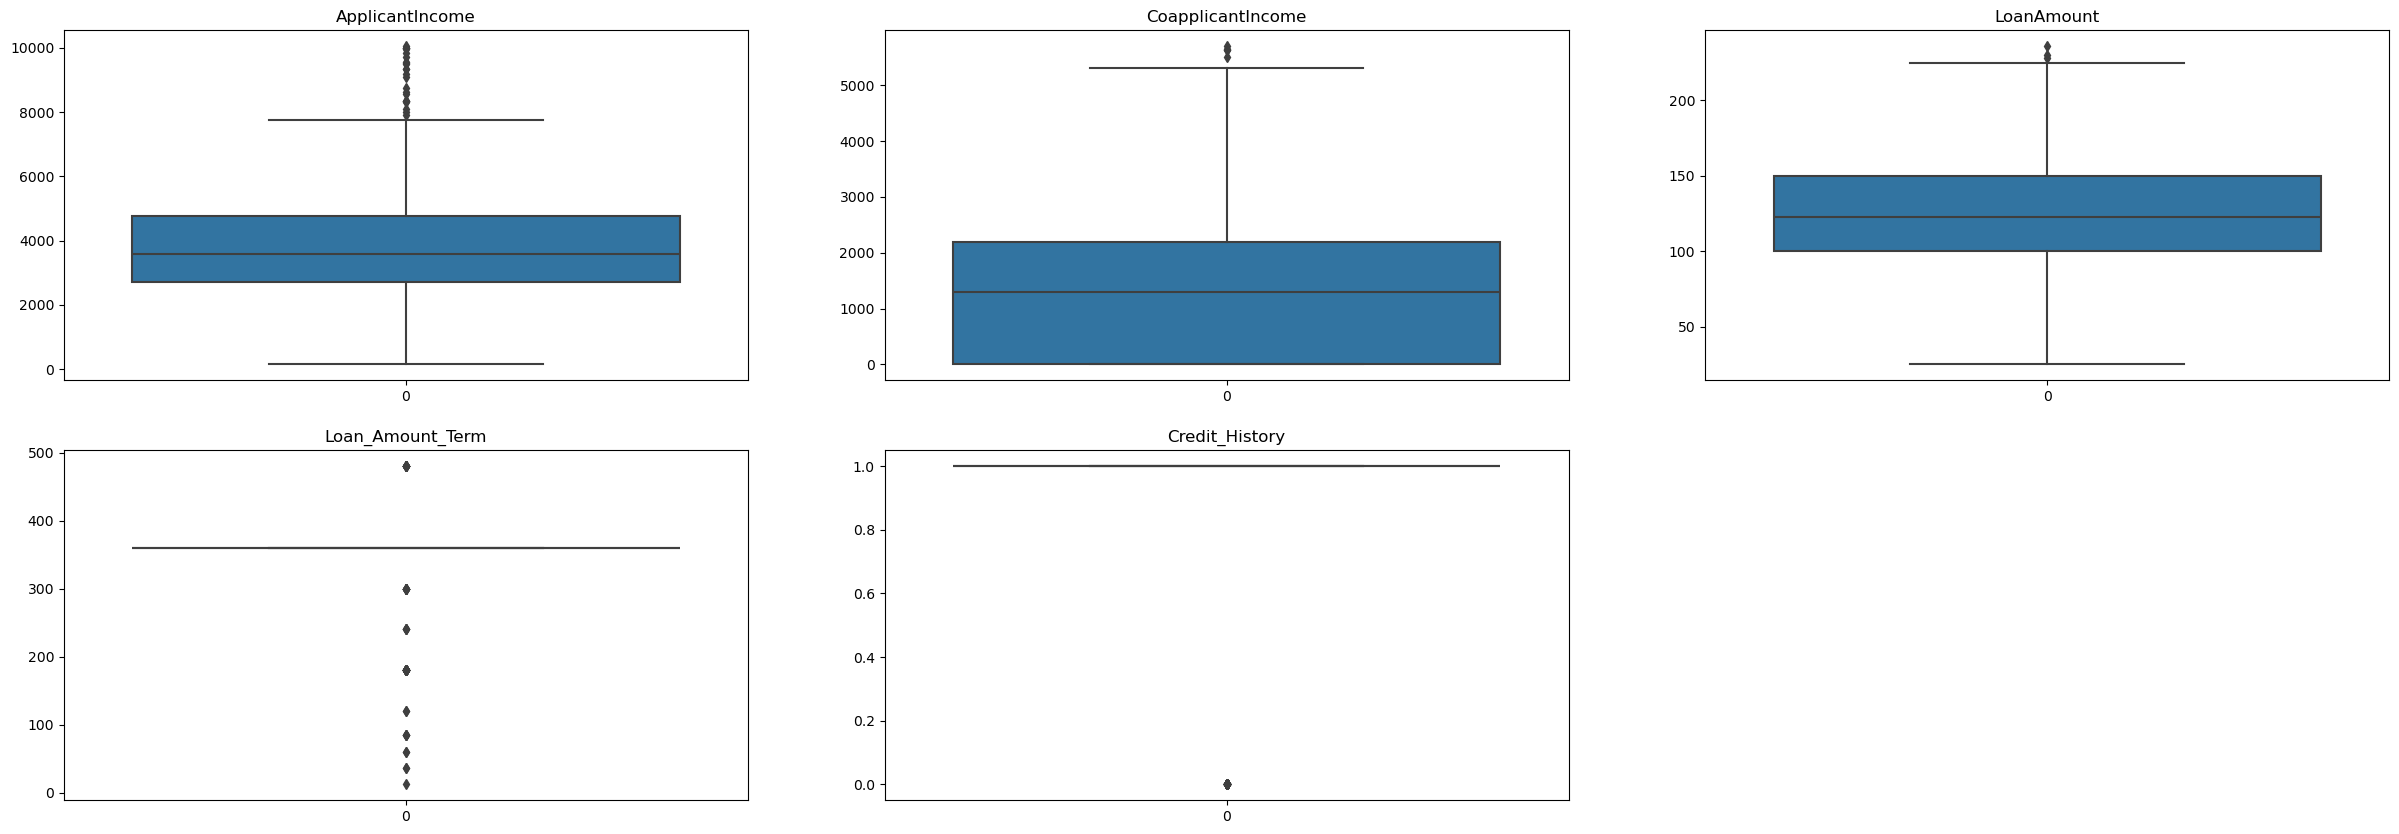

In [120]:
col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize = (30,10))
n = np.arange(0,5,1)

for i , k in zip(col,n):
    plt.subplot(2,3,k+1)
    sns.boxplot(data[i])
    plt.title(col[k])
    plt.tight_layout

### 7.Feature Scaling

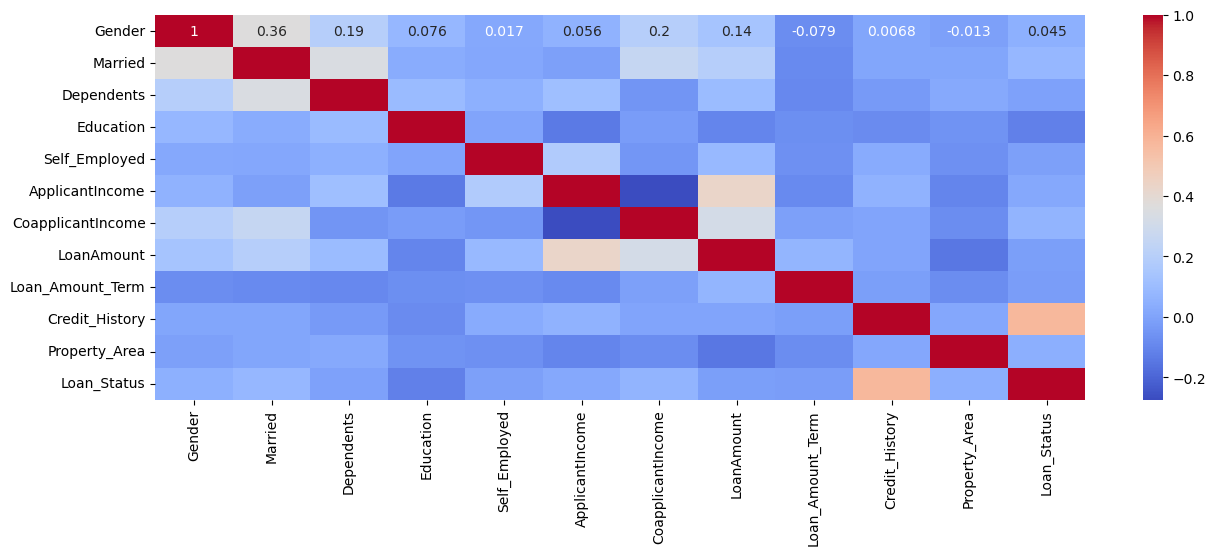

In [124]:
plt.figure(figsize =(15,5))
sns.heatmap(data.corr(), annot = True,cmap='coolwarm')
plt.show()

In [126]:
data.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


### 8.Split data in train and test

In [136]:
x = data.drop('Loan_Status', axis = 1)
y = data.Loan_Status
print(x.shape)
y.shape

(520, 11)


(520,)

In [138]:
y.value_counts()

Loan_Status
1    362
0    158
Name: count, dtype: int64

In [140]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over,y_over = over.fit_resample(x,y)

In [144]:
print(x_over.shape)
y_over.shape

(724, 11)


(724,)

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,train_size=0.75,random_state = 101)

In [148]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(543, 11)
(181, 11)
(543,)
(181,)


### 8.Building Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [156]:
logit_model.intercept_

array([0.02322761])

In [158]:
logit_model.coef_

array([[ 8.62722827e-02,  4.43909127e-01, -3.72845913e-02,
        -6.94330165e-01, -1.09243020e-01, -6.00817135e-05,
         1.08540520e-04, -7.22317888e-03, -4.90987516e-03,
         3.06716423e+00,  3.36861415e-02]])

In [160]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [162]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [164]:
print(confusion_matrix(y_train, y_pred_train))
print("----------------")
print(confusion_matrix(y_test, y_pred_test))

[[167 109]
 [ 38 229]]
----------------
[[52 34]
 [10 85]]


In [172]:
print(classification_report(y_train, y_pred_train))
print("############################"*2)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69       276
           1       0.68      0.86      0.76       267

    accuracy                           0.73       543
   macro avg       0.75      0.73      0.73       543
weighted avg       0.75      0.73      0.73       543

########################################################
              precision    recall  f1-score   support

           0       0.84      0.60      0.70        86
           1       0.71      0.89      0.79        95

    accuracy                           0.76       181
   macro avg       0.78      0.75      0.75       181
weighted avg       0.77      0.76      0.75       181



In [174]:
print("Training Accuracy Score :",accuracy_score(y_train, y_pred_train))
print("###########"*4)
print("Test Accuracy Score :",accuracy_score(y_test, y_pred_test))

Training Accuracy Score : 0.7292817679558011
############################################
Test Accuracy Score : 0.7569060773480663
